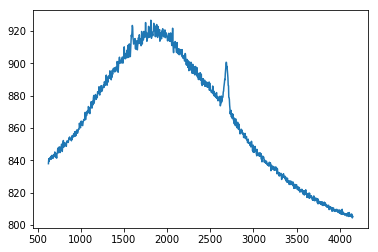

In [15]:
# import one set of data

import pylab as py

# open files
f_x1 = open('C:\\Users\\abarrett.BNL\\Data\\2017.07.20\\Gr_Cu\\01 Single Spectrum_000_Spec.Data 1 (X-Axis).txt','r')
f_y1 = open('C:\\Users\\abarrett.BNL\\Data\\2017.07.20\\Gr_Cu\\01 Single Spectrum_000_Spec.Data 1 (Y-Axis).txt','r')

# import data
x1 = []
y1 = [] 

for line in f_x1 :
	x1.append(float(line))

for line in f_y1 : 
	y1.append(float(line))

py.plot(x1,y1)
# py.xlim(2600, 2800)
# py.ylim(800, 950)
py.show()

f_x1.close()
f_y1.close()

C:\Users\abarrett.BNL\Data\2018.06.21\ACS_3-5_layer_Gr_Cu\Z_position\Single Spectrum_008_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2018.06.21\ACS_3-5_layer_Gr_Cu\Z_position\Single Spectrum_008_Spec.Data 1 (Y-Axis).txt
C:\Users\abarrett.BNL\Data\2018.06.21\ACS_3-5_layer_Gr_Cu\Z_position\Single Spectrum_009_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2018.06.21\ACS_3-5_layer_Gr_Cu\Z_position\Single Spectrum_009_Spec.Data 1 (Y-Axis).txt
C:\Users\abarrett.BNL\Data\2018.06.21\ACS_3-5_layer_Gr_Cu\Z_position\Single Spectrum_010_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2018.06.21\ACS_3-5_layer_Gr_Cu\Z_position\Single Spectrum_010_Spec.Data 1 (Y-Axis).txt
C:\Users\abarrett.BNL\Data\2018.06.21\ACS_3-5_layer_Gr_Cu\Z_position\Single Spectrum_011_Spec.Data 1 (X-Axis).txt
C:\Users\abarrett.BNL\Data\2018.06.21\ACS_3-5_layer_Gr_Cu\Z_position\Single Spectrum_011_Spec.Data 1 (Y-Axis).txt
C:\Users\abarrett.BNL\Data\2018.06.21\ACS_3-5_layer_Gr_Cu\Z_position\Single Spectrum_012

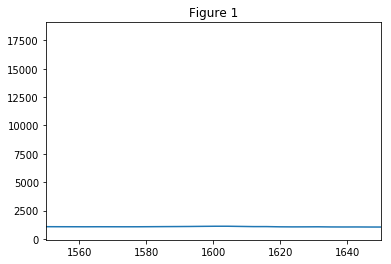

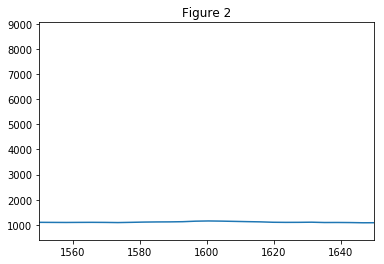

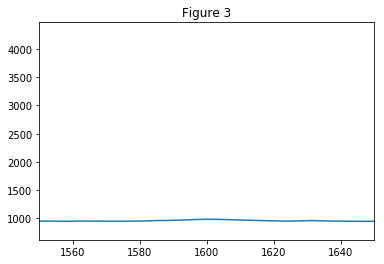

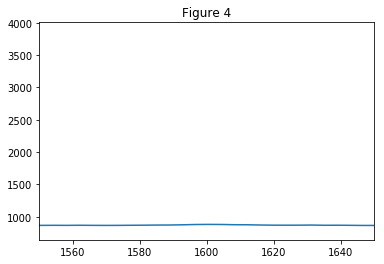

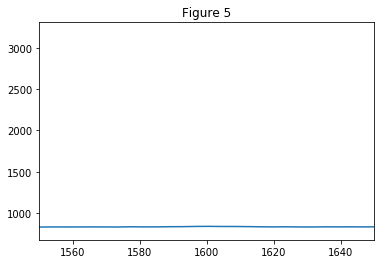

In [76]:
# import data for batch processing

import pylab as py
import os
import numpy as np
import matplotlib.pyplot as plt

# print specification
np.set_printoptions(threshold = np.nan)

# folder containing only the data to be imported
path = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.21\\ACS_3-5_layer_Gr_Cu\\Z_position'

# import data from each file
data = np.array([])
for filename in os.listdir(path):
    fpath = path + '\\' + filename
    print(fpath)
    with open(fpath,'r') as f:
        x = []
        for line in f:
            x.append(float(line))    
        data = np.append(data, x)
    
# reshape into matrix, each file has its own row
# ORDERING ISSUE HERE
num_files = len(os.listdir(path))
data = data.reshape(num_files, len(data) // num_files)

# iteratively plot data 
idx = data.shape[0] // 2
for i in range(idx):
    plt.figure(i)
    py.title('Figure ' + str(i+1))
    py.plot(data[2*i],data[2*i + 1])
    py.xlim(1550,1650)
    py.show()

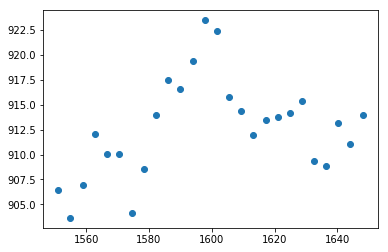

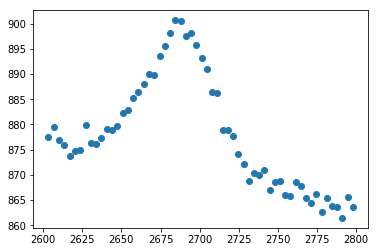

In [92]:
# automatically select the appropriate ranges in the data (one measurment)

import numpy as np

# set cutoffs for each peak
start_G = 1550
end_G = 1650
start_2D = 2600
end_2D = 2800

# convert to numpy arrays
x1_np = np.array(x1)
y1_np = np.array(y1)

# select G peak
x1_G = x1_np[(np.argmax(x1_np>start_G)):(np.argmax(x1_np>end_G))]
y1_G = y1_np[(np.argmax(x1_np>start_G)):(np.argmax(x1_np>end_G))]

# select 2D peak
x1_2D = x1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]
y1_2D = y1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]

plt.figure(1)
py.scatter(x1_G,y1_G)

plt.figure(2)
py.scatter(x1_2D,y1_2D)


In [10]:
# automatically select peak ranges (batch processing)

import numpy as np

# set cutoffs for each peak
start_G = 1550
end_G = 1650
start_2D = 2600
end_2D = 2800

# select peaks
data_G = np.array([])
data_2D = np.array([])
idx = data.shape[0] // 2
for i in range(data.shape[0]):
    if i < idx:
        row = data[i]
        row2 = row[(np.argmax(row>start_G)):(np.argmax(row>end_G))]
        data_G = np.append(data_G, row2)
        row3 = row[(np.argmax(row>start_2D)):(np.argmax(row>end_2D))]
        data_2D = np.append(data_2D, row3)
    else:    
        row = data[i - idx]
        row2 = data[i]
        row3 = row2[(np.argmax(row>start_G)):(np.argmax(row>end_G))]
        data_G = np.append(data_G, row3)
        row4 = row2[(np.argmax(row>start_2D)):(np.argmax(row>end_2D))]
        data_2D = np.append(data_2D, row4)
# each measurement is a row
data_G = data_G.reshape(idx*2, len(data_G) // (idx*2)) 
data_2D = data_2D.reshape(idx*2, len(data_2D) // (idx*2)) 

# iteratively plot data  
for i in range(idx):
    plt.figure(i)
    py.title('G Peak ' + str(i+1))
    py.scatter(data_G[i],data_G[i+idx])
    py.show()
for i in range(idx):
    plt.figure(i+idx)
    py.title('2D Peak ' + str(i+1))
    py.scatter(data_2D[i], data_2D[i+idx])
    py.show()
    


ValueError: cannot reshape array of size 104 into shape (6,17)

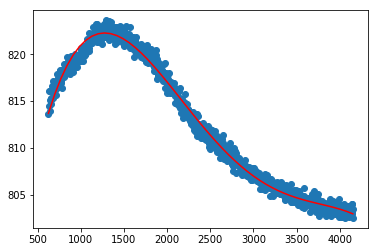

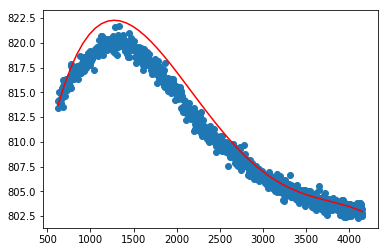

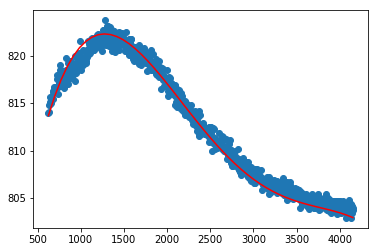

In [40]:
# copper polynomial curve fitting

from scipy.optimize import curve_fit

# degree of polynomial fit
degree = 4

# data to be fit
x = data[0,:]
y = data[1,:]

# def fit_func(x, a, b, c):
#     return a*(x**2) + b*x + c
# params = curve_fit(fit_func, x1, y1)
# [a, b, c] = params[0]

# calculate polynomial
z = np.polyfit(x, y, degree)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

idx = data.shape[0] // 2
for i in range(idx):
    plt.figure(i+1)
    py.scatter(data[2*i],data[2*i + 1])
    py.plot(x_new,y_new,'-r')
    py.show()

In [166]:
# take heatmap text files and convert to csv

import csv
import tempfile

# text file to convert, file path for csv to create
path = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um'
filename = '4 Scan_000_Spec.Data 1_F Width 7 (Pos 2700.0 rel. 1cm)'
txt_file = path + '\\' + filename + '.txt'
csv_file = path + '\\' + filename + '.csv'

# create temp text file with header removed
temp = path + '\\' + 'temp.txt'
f = open(temp, 'w')
f.close() # this erases the contents of temp.txt
with open(txt_file, 'r') as fin:
    data = fin.read().splitlines(True)
with open(temp, 'w') as fout:
    fout.writelines(data[14:])

# write to csv    
in_txt = csv.reader(open(temp), delimiter = '\t')
output = csv.writer(open(csv_file, 'w'))
output.writerows(in_txt)

f = open(csv_file, 'r')
f.close()


In [ ]:
# Raman heatmap
# need to have data in .csv file 

import seaborn as sns

pathG = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um\\csv3.csv'
path2D = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\Platform_1_layer_PET_EVA_Gr\\25um\\hmap2_csv.csv'

height_G = np.loadtxt(open(pathG, "rb"), delimiter=",", skiprows=1)
# height_2D = np.loadtxt(open(path2D, "rb"), delimiter=",", skiprows=1)
# ratio = height_2D / height_G

plt.figure(1)
plt.imshow(height_G, cmap='hot', interpolation='nearest')
plt.title('G Peak')
plt.colorbar()
plt.show()

# plt.figure(2)
# plt.imshow(height_2D, cmap='hot', interpolation='nearest')
# plt.title('2D Peak')
# plt.colorbar()
# plt.show()

# plt.figure(3)
# plt.imshow(ratio, cmap='hot', interpolation='nearest')
# plt.title('2D / G Ratio')
# plt.colorbar()
# plt.show()

# for line in g2:
#     print(line)

# plt.figure(4)
# sns.heatmap(height_2D, linewidth=0.5)
# plt.show()


In [73]:
# load image scan data (takes at least 2 min 40 sec)

path = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.20\\ACS_6-8_layer_Gr_Cu\\'
xfile = path + '1 Scan_002_Spec.Data 1_F (X-Axis).txt'
yfile = path + '1 Scan_002_Spec.Data 1_F (Y-Axis).txt'

import numpy as np

# load data
x = np.loadtxt(xfile)
y_temp = np.loadtxt(yfile)

# y is a list, each element of the list is a numpy array
# of the spectrum of one pixel
y = np.split(y_temp, len(y_temp) / len(x))


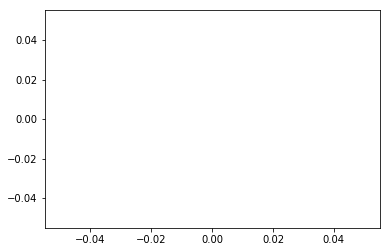

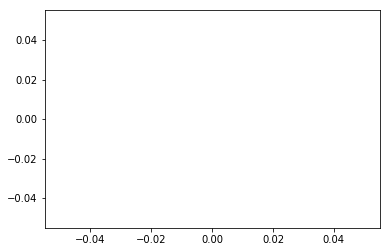

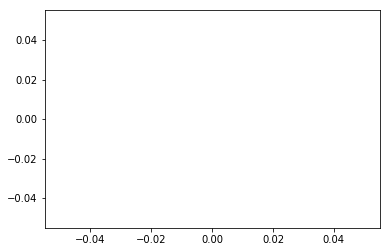

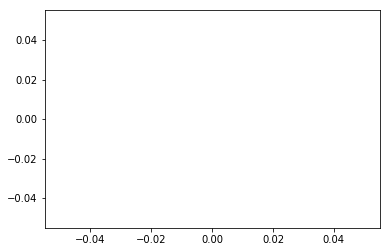

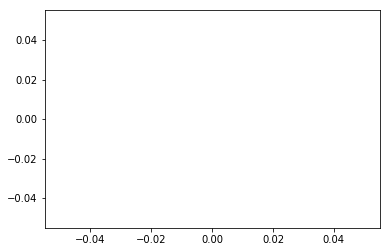

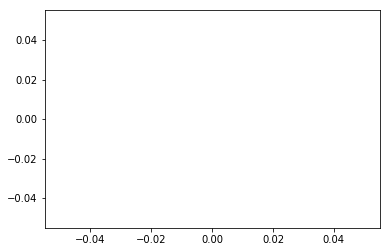

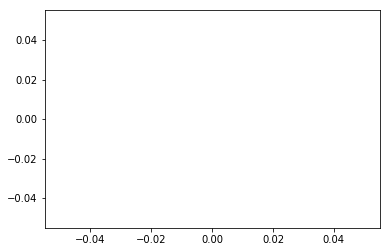

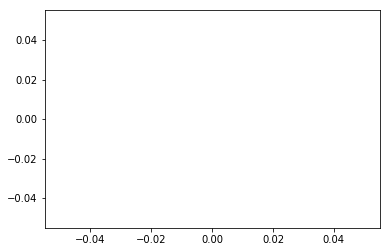

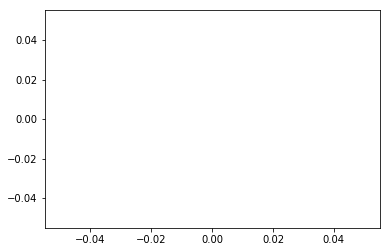

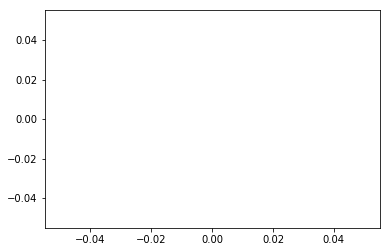

In [60]:
import pylab as py

plots = [1, 12, 23, 34, 45, 56, 67, 78, 89, 90]

for i in range(10):
    plt.figure(i)    
#     py.scatter(x, y[i * 10 - 1])
    
    spec_start = np.argmax(x>1300)
    spec_end = np.argmax(x_np>3000)
    py.plot(x[spec_start:spec_end],y[plots[i]][spec_start:spec_end])
    
#     py.xlim(1500, 2800)
#     py.ylim(800, 900)
    py.show()

(820, 880)

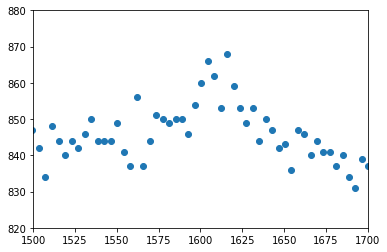

In [67]:
py.scatter(x, y[6 * 1024 - 1])
py.xlim(1500, 1700)
py.ylim(820, 880)

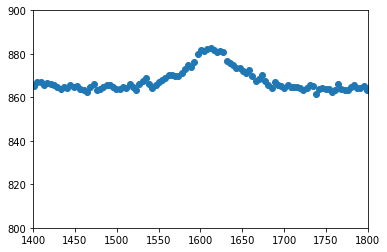

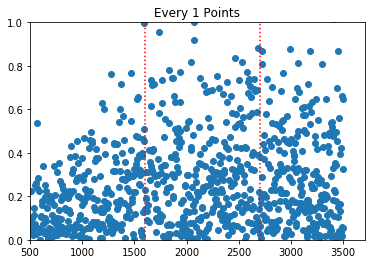

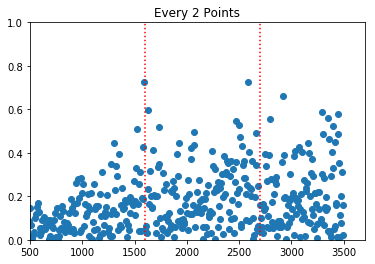

In [188]:
# background subtraction - point-wise slope method


# number plots to make
gaps = []
for i in range(2):
    gaps.append(i + 1)

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (Y-Axis).txt','r')

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (Y-Axis).txt','r')

# xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (X-Axis).txt','r')
# yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (Y-Axis).txt','r')

xfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\3 ACS_6-8_layer_Gr_Cu_spec3 (X-Axis).txt','r')
yfile = open('C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\3 ACS_6-8_layer_Gr_Cu_spec3 (Y-Axis).txt','r')


x = np.loadtxt(xfile)
y = np.loadtxt(yfile)

x_len = len(x)

plt.figure(0)
py.scatter(x,y)
py.xlim(1400, 1800)
py.ylim(800, 900)
py.show

for gap in gaps:
    slopes = []
    x2 = []
    for i in range(x_len // gap - 1):
        slope = abs((y[gap*i + gap] - y[gap*i]) / (x[gap*i + gap] - x[gap*i]))
        slopes.append(slope)
        x2.append(x[gap*i])
    #     print(gap*i + gap)

    plt.figure(gap)
    plt.axvline(x=1600, linestyle=':', color='r')
    plt.axvline(x=2700, linestyle=':', color='r')
    py.title('Every ' + str(gap) + ' Points')
    py.scatter(x2, slopes)
    py.xlim(500)
    py.ylim(0, 1)
    py.show

    








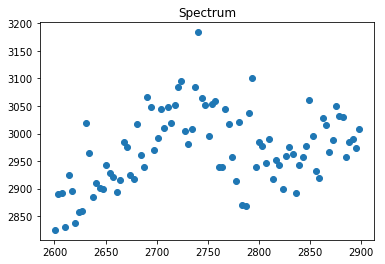

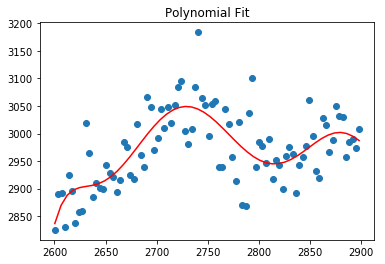

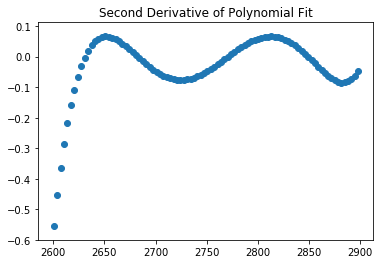

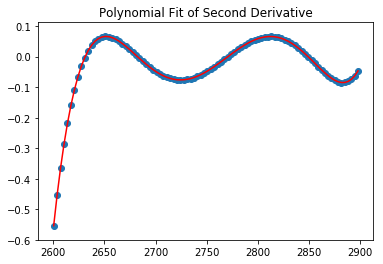

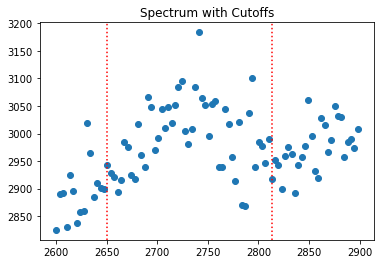

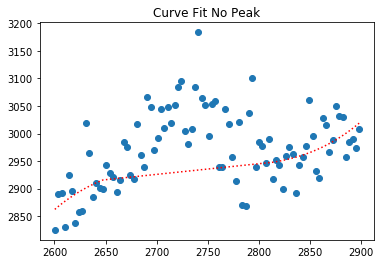

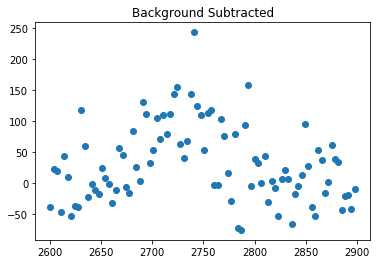

In [74]:
# BACKGROUND SUBTRACTION (One peak only - use for debugging)
# Fits a polynomial over the peak between start_range and end_range. Uses the local maxima of the second 
# derivative of that polynomial to determine the cutoff points for the peak itself. Fits a polynomial to 
# the data that excludes the peak, and subtracts that background polynomial from the spectrum data to 
# give final peak


# SELECT APPROPRIATE DATA RANGE

# set cutoffs for each peak
# range : range over which to fit polynomial
start_G_range = 2600
end_G_range = 2900
# peak : minimum possible wavenumber for start of peak itself
# use this to eliminate edge effects of derivatives
start_G_peak = 2600



# LOAD SPECTRUM

# xpath = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (X-Axis).txt'
# ypath = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_1_layer\\1 Gr_Cu_1layer_spec1 (Y-Axis).txt'

# xpath = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (X-Axis).txt'
# ypath = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.11\\Gr_Cu_3-5_layer\\1 Gr_Cu_3-5layer_spec1 (Y-Axis).txt'

# xpath = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (X-Axis).txt'
# ypath = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.12\\ACS_3-5_layer_Gr_Cu\\1 ACS_3-5_layer_Gr_Cu_spec2 (Y-Axis).txt'

# xpath = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\1 ACS_6-8_layer_Gr_Cu_spec1 (X-Axis).txt'
# ypath = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.13\ACS_6-8_layer_Gr_Cu\\1 ACS_6-8_layer_Gr_Cu_spec1 (Y-Axis).txt'

# xpath = 'C:\\Users\\abarrett.BNL\\Data\\2017.07.20\\Gr_Cu\\01 Single Spectrum_000_Spec.Data 1 (X-Axis).txt'
# ypath = 'C:\\Users\\abarrett.BNL\\Data\\2017.07.20\\Gr_Cu\\01 Single Spectrum_000_Spec.Data 1 (Y-Axis).txt'
        
# with open(xpath, 'r') as xfile:        
#     x = np.loadtxt(xfile)
# with open(ypath, 'r') as yfile:
#     y = np.loadtxt(yfile)

x1 = x
y1 = y[23]

# convert to numpy arrays
x_np = np.array(x1)
y_np = np.array(y1)

# select G peak
x_G = x_np[(np.argmax(x_np>start_G_range)):(np.argmax(x_np>end_G_range))]
y_G = y_np[(np.argmax(x_np>start_G_range)):(np.argmax(x_np>end_G_range))]

# # select 2D peak
# x1_2D = x1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]
# y1_2D = y1_np[(np.argmax(x1_np>start_2D)):(np.argmax(x1_np>end_2D))]

plt.figure(0)
py.title('Spectrum')
py.scatter(x_G,y_G)



# POLYNOMIAL FIT TO SPECTRUM

# degree of polynomial fit
degree = 10

# calculate polynomial
z = np.polyfit(x_G, y_G, degree)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x_G[0], x_G[-1], 50)
y_new = f(x_new)

plt.figure(1)
py.title('Polynomial Fit')
py.scatter(x_G,y_G)
py.plot(x_new,y_new,'-r')
py.show()

# derivatives
import scipy.misc as sm
derivs2 = []
for i in x_G:
    derivs2.append((sm.derivative(f, i, n=2)))

plt.figure(3)
py.title('Second Derivative of Polynomial Fit')
py.scatter(x_G, derivs2)
py.show()


# FIND LOCAL MAXIMA OF SECOND DERIVATIVE
# fits a polynomial to 2nd derivative, finds maxima of that

# degree of polynomial fit
degree = 10

# calculate polynomial
z = np.polyfit(x_G, derivs2, degree)
f2 = np.poly1d(z)

# calculate new x's and y's
y2 = f2(x_G)

plt.figure(4)
py.title('Polynomial Fit of Second Derivative')
py.scatter(x_G,derivs2)
py.plot(x_G, y2,'-r')
py.show()

# find max 
from scipy.signal import argrelextrema

idx = np.argmax(x_G>start_G_peak)
x_Gpeak = x_G[idx:]
derivs2a = y2[idx:]

x = np.array(derivs2a)

# this is indexed from the start of x_Gpeak
maxs = argrelextrema(x, np.greater)
start_idx = maxs[0][0]
end_idx = maxs[0][1] 
start = x_Gpeak[start_idx]
end = x_Gpeak[end_idx]

plt.figure(4)
py.title('Spectrum with Cutoffs')
plt.axvline(x=start, linestyle=':', color='r')
plt.axvline(x=end, linestyle=':', color='r')
# plt.axhline(y=avg1, linestyle=':', color='r')
# plt.axhline(y=avg2, linestyle=':', color='r')
py.scatter(x_G,y_G)


# FIT CURVE TO BACKGROUND 

# indexed from start of x_G
start_true_idx = idx + start_idx
end_true_idx = idx + end_idx
x_G_no_peak = np.concatenate((x_G[:start_true_idx], x_G[end_true_idx:]))
y_G_no_peak = np.concatenate((y_G[:start_true_idx], y_G[end_true_idx:]))


degree = 3
# calculate polynomial
z = np.polyfit(x_G_no_peak, y_G_no_peak, degree)
f3 = np.poly1d(z)

# calculate new x's and y's
y3 = f3(x_G_no_peak)

plt.figure(6)
py.title('Curve Fit No Peak')
py.scatter(x_G, y_G)
py.plot(x_G_no_peak, y3, linestyle=':', color='r')
py.show()


# SUBTRACT OUT BACKGROUND
y_G_fixed = y_G - f3(x_G)
plt.figure(7)
py.title('Background Subtracted')
py.scatter(x_G, y_G_fixed)

In [69]:
x_np

array([ 3.21938563e-02,  4.26798631e-02,  5.30306585e-02,  6.27819579e-02,
        7.15779979e-02,  7.90546108e-02,  8.49463176e-02,  8.89674239e-02,
        9.09314603e-02,  9.06886905e-02,  8.81450754e-02,  8.32783859e-02,
        7.60815535e-02,  6.66638408e-02,  5.51337898e-02,  4.17015068e-02,
        2.65154019e-02,  9.91172902e-03, -7.85333291e-03, -2.64561698e-02,
       -4.55483813e-02, -6.47630915e-02, -8.36729556e-02, -1.01946170e-01,
       -1.19202621e-01, -1.35070400e-01, -1.49192536e-01, -1.61205536e-01,
       -1.70865538e-01, -1.77851733e-01, -1.81962484e-01, -1.83015317e-01,
       -1.80883188e-01, -1.75500469e-01, -1.66848559e-01, -1.54972620e-01,
       -1.39982870e-01, -1.22106470e-01, -1.01493854e-01, -7.85620175e-02,
       -5.36349248e-02, -2.71497127e-02,  3.24731693e-04,  2.83833407e-02,
        5.62853888e-02,  8.34715031e-02,  1.09279573e-01,  1.33028764e-01,
        1.53981404e-01,  1.71529649e-01,  1.85025256e-01,  1.93863077e-01,
        1.97501430e-01,  

G Height : 126.94281222180443
G FWHM : 59.132020365853876


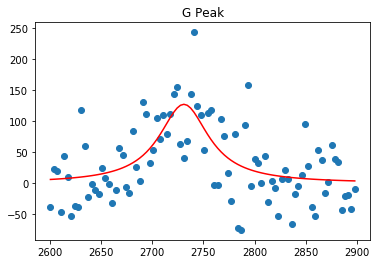

2D Height : 7.803694467416056
2D FWHM : 41.01356094724396


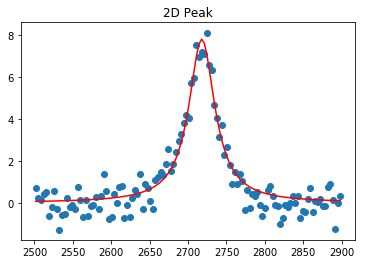

2D / G ratio : 0.061474094758361186


In [75]:
# Lorenztian curve fit to peaks 
# must first do background subtraction


from scipy.optimize import curve_fit
from math import pi

xdata_G = x_G
ydata_G = y_G_fixed
xdata_2D = x_2D
ydata_2D = y_2D_fixed

# initial parameters (guess - doesn't really matter)
init_center_G = 1600
init_width_G = 10
init_amplitude_factor_G = 300

init_center_2D = 2700
init_width_2D = 10
init_amplitude_factor_2D = 300

init_params_G = [init_center_G, init_width_G, init_amplitude_factor_G]
init_params_2D = [init_center_2D, init_width_2D, init_amplitude_factor_2D]

# lorentzian peak function
def lorentz(x, center, width, A):
    return ( A * (0.5 * width) / (pi * ( ((x - center) ** 2) + ((0.5 * width) ** 2) ) ))

params_G, cov_G = curve_fit(lorentz, xdata_G, ydata_G, p0=init_params_G)
height_G = params_G[2] * 2 / (pi * params_G[1])
FWHM_G = params_G[1]

params_2D, cov_2D = curve_fit(lorentz, xdata_2D, ydata_2D, p0=init_params_2D)
height_2D = params_2D[2] * 2 / (pi * params_2D[1])
FWHM_2D = params_2D[1]

# print('G Parameters : ' + str(params_G))
print('G Height : ' + str(height_G))
print('G FWHM : ' + str(FWHM_G))

plt.figure(0)
py.title('G Peak')
py.scatter(xdata_G, ydata_G)
py.plot(xdata_G, lorentz(xdata_G, *params_G), color='r')
py.show()

# print('2D Parameters : ' + str(params_2D))
print('2D Height : ' + str(height_2D))
print('2D FWHM : ' + str(FWHM_2D))


plt.figure(1)
py.title('2D Peak')
py.scatter(xdata_2D, ydata_2D)
py.plot(xdata_2D, lorentz(xdata_2D, *params_2D), color='r')
py.show()

ratio = height_2D / height_G

print('2D / G ratio : ' + str(ratio))



In [13]:
maxs_2D

(array([53], dtype=int64),)